<a href="https://colab.research.google.com/github/sam-98/CovidDetectionXRay/blob/master/covid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# download data of xray 
!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a

Downloading...
From: https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a
To: /content/Covid_Data_GradientCrescent.zip
154MB [00:02, 62.3MB/s]


In [2]:
!unzip /content/Covid_Data_GradientCrescent.zip

Archive:  /content/Covid_Data_GradientCrescent.zip
   creating: all/
   creating: all/test/
   creating: all/test/covid/
  inflating: all/test/covid/nejmoa2001191_f3-PA.jpeg  
  inflating: all/test/covid/nejmoa2001191_f4.jpeg  
  inflating: all/test/covid/nejmoa2001191_f5-PA.jpeg  
  inflating: all/test/covid/radiol.2020200490.fig3.jpeg  
  inflating: all/test/covid/ryct.2020200028.fig1a.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig2.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day0.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day4.jpeg  
  inflating: all/test/covid/ryct.2020200034.fig5-day7.jpeg  
   creating: all/test/normal/
  inflating: all/test/normal/NORMAL2-IM-1385-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1396-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1400-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1401-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1406-0001.jpeg  
  inflating: all/test/normal/NORMAL2-IM-1412-000

In [3]:
import numpy as np
import tensorflow as tf
train_dir = '/content/two/train'
test_dir = '/content/two/test'
img_size = (150, 150)
batch_size = 10 
epoch = 20
learning_rate = 0.0005

In [4]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

train_data = ImageDataGenerator(rescale = 1./255,
                                rotation_range=50,
                                featurewise_center = True,
                                featurewise_std_normalization = True,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.25,
                                zoom_range=0.1,
                                zca_whitening = True,
                                channel_shift_range = 20,
                                horizontal_flip = True ,
                                vertical_flip = True ,
                                validation_split = 0.2,
                                fill_mode='constant')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [5]:

train_generator = train_data.flow_from_directory(train_dir, 
                                                 target_size = img_size,
                                                 shuffle = True,
                                                 batch_size = batch_size,
                                                 subset = 'training',
                                                 class_mode = 'binary') 
valid_generator = train_data.flow_from_directory(train_dir,
                                                 target_size = img_size,
                                                 shuffle = True,
                                                 batch_size = batch_size,
                                                 subset = 'validation',
                                                 class_mode = 'binary') #2binary

Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [6]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.layers.core import Flatten, Dense, Dropout, Lambda

In [7]:

base = tf.keras.applications.VGG16(weights = 'imagenet',
             include_top = False,
             input_shape = (150, 150, 3))
base.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [8]:

model = Sequential()
model.add(base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

In [9]:

ss_train = train_generator.n//train_generator.batch_size
ss_valid = valid_generator.n//valid_generator.batch_size

In [10]:
output = model.fit_generator(train_generator,
                             steps_per_epoch = ss_train,
                             validation_data = valid_generator,
                             validation_steps = ss_valid,
                             epochs = epoch
                             )

Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
10/10 [==============================] - 27s 3s/step - loss: 1.7134 - accuracy: 0.4894 - val_loss: 0.6604 - val_accuracy: 0.5500
Epoch 2/20
10/10 [==============================] - 27s 3s/step - loss: 0.5753 - accuracy: 0.6383 - val_loss: 0.2417 - val_accuracy: 0.9500
Epoch 3/20
10/10 [==============================] - 26s 3s/step - loss: 0.3468 - accuracy: 0.8830 - val_loss: 0.2169 - val_accuracy: 0.9000
Epoch 4/20
10/10 [==============================] - 26s 3s/step - loss: 0.2704 - accuracy: 0.8936 - val_loss: 0.1368 - val_accuracy: 0.9500
Epoch 5/20
10/10 [==============================] - 27s 3s/step - loss: 0.2359 - accuracy: 0.8936 - val_loss: 0.3863 - val_accuracy: 0.8500
Epoch 6/20
10/10 [==============================] - 27s 3s/step - loss: 0.1742 - accuracy: 0.9574 - val_loss: 0.1528 - val_accuracy: 0.9500
Epoch 7/20
10/10 [==============================] - 27s 3s/step - loss: 0.1935 - accuracy: 0.9149 - val_loss: 0.2557 - val_accuracy: 0.8500
Epoch 8/20
10/10 [==

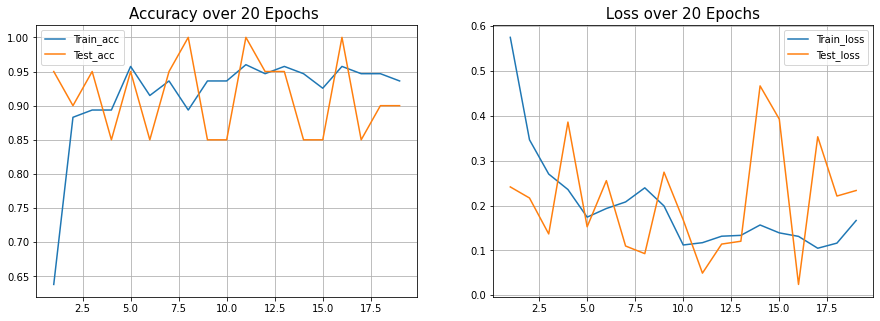

In [11]:
import matplotlib.pyplot as plt
def plot_acc_loss(output, epochs):
 acc = output.history['accuracy']
 loss = output.history['loss']
 val_acc = output.history['val_accuracy']
 val_loss = output.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) +  ' Epochs ', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title(' Loss over ' + str(epochs) + ' Epochs ', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(output, 20)

In [12]:
test_generator = ImageDataGenerator(rescale = 1./255)
evaluation = test_generator.flow_from_directory(test_dir,
                                                target_size = img_size,
                                                batch_size = 1,
                                                shuffle = True,
                                                seed = 0,
                                                class_mode = 'binary')#4
x = model.evaluate_generator(evaluation,
                            steps = np.ceil(len(evaluation)/batch_size),
                            use_multiprocessing = False,
                            verbose = 1,
                            workers=1)
print('Test loss: ' , x[0])
print('Test accuracy: ',x[1])

Found 18 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
2/2 [==============================] - 0s 134ms/step - loss: 0.0058 - accuracy: 1.0000
Test loss:  0.00579750444740057
Test accuracy:  1.0
